**This notebook is created on gogle colab.**

In [1]:
!pip install pillow


Lab Task 1:
Read any image that you want using the right command and display it.

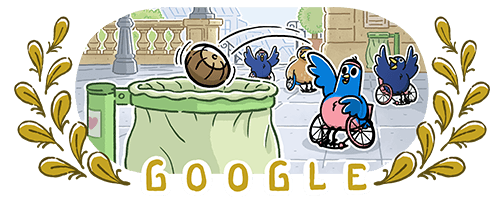

In [13]:

from PIL import Image
from IPython.display import display

# Define the file path to your uploaded image
image_path = './download.jpg'  # Update with your image file name

# Open and display the image
img = Image.open(image_path)
display(img)


Lab Task 2:
a) Now mirror the image that you have read at center i.e. the lower half of the image should be the copy of the upper half. (HINT:  You can use nested loops). Write the image to the disk using the right command.

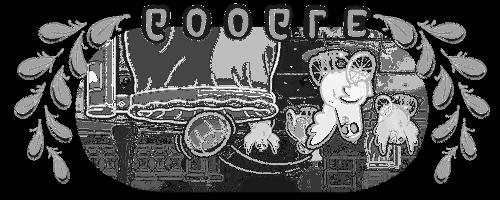

b) Now completely flip the image so that image is upside and down

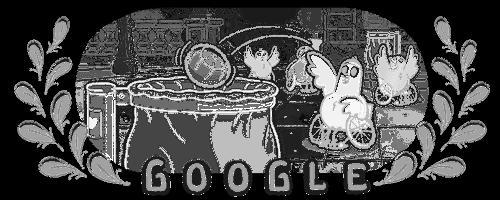

In [21]:
from PIL import Image
import numpy as np

original_image_path = './download.jpg' 

original_img = Image.open(original_image_path)

img_array = np.array(original_img)

height, width= img_array.shape

for row in range(height // 2):
    for col in range(width):
        temp = img_array[row, col].copy()
        img_array[row, col] = img_array[height - row - 1, col]
        img_array[height - row - 1, col] = temp

mirrored_img = Image.fromarray(img_array)

mirrored_image_path = 'mirrored_image.jpg'  
mirrored_img.save(mirrored_image_path)
img2a = Image.open(mirrored_image_path)
display(img2a)

Lab Task 3:
Create an r x c matrix of ones and pad 10 pixels wide border of zeros across each side of it, such that its order will become (4+500+4) x (4+500+4) = 508x508 as shown below:
Create a generic function so that the values (500 and 4) can be passed by the user.

In [22]:
import numpy as np

def create_padded_matrix(r, c, border_width):
    # Create an r x c matrix of ones
    ones_matrix = np.ones((r, c), dtype=int)

    # Calculate the new dimensions with the padded border
    new_r = r + 2 * border_width
    new_c = c + 2 * border_width

    # Create a new matrix of zeros with the new dimensions
    padded_matrix = np.zeros((new_r, new_c), dtype=int)

    # Place the ones_matrix in the center of the padded_matrix
    padded_matrix[border_width:border_width + r, border_width:border_width + c] = ones_matrix

    return padded_matrix

# Example usage with r = 500, c = 500, and border_width = 4
r = 500
c = 500
border_width = 4

padded_matrix = create_padded_matrix(r, c, border_width)
print(padded_matrix)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Lab Task 4:
 Write 3 different Python functions that can create the images given below. Code them in such so that the size of image itself and the boxes and the lines can be changed.

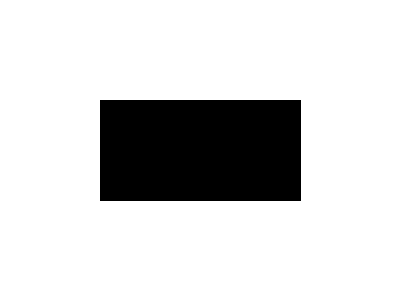

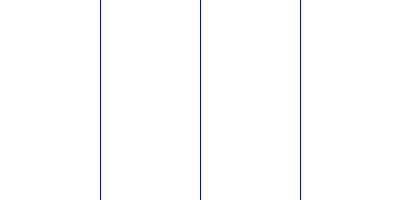

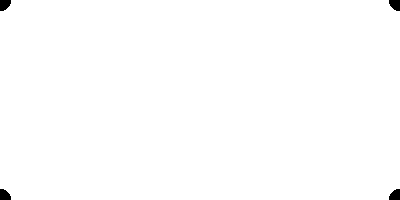

In [40]:
from PIL import Image, ImageDraw
from IPython.display import display

def display_image(img):
    display(img)

def create_image_with_rectangle(image_size, rectangle_size, background_color, rectangle_color):
    img = Image.new('RGB', image_size, background_color)
    draw = ImageDraw.Draw(img)
    draw.rectangle([100, 100, rectangle_size[0], rectangle_size[1]], fill=rectangle_color)
    display_image(img)

def create_image_with_lines(image_size, line_color, line_positions):
    img = Image.new('RGB', image_size, (255, 255, 255))
    draw = ImageDraw.Draw(img)
    for pos in line_positions:
        draw.line([(pos, 0), (pos, image_size[1])], fill=line_color)
    display_image(img)

def create_image_pillow(image_size, point_radius=10, point_color=(0, 0, 0)):
    # Create a white background image
    image = Image.new('RGB', image_size, 'white')
    draw = ImageDraw.Draw(image)
    
    # Define points at each corner
    corners = [
        (0, 0),  # Top-left corner
        (image_size[0] - 1, 0),  # Top-right corner
        (0, image_size[1] - 1),  # Bottom-left corner
        (image_size[0] - 1, image_size[1] - 1)  # Bottom-right corner
    ]
    
    # Draw points at each corner
    for corner in corners:
        draw.ellipse([corner[0] - point_radius, corner[1] - point_radius, 
                      corner[0] + point_radius, corner[1] + point_radius], 
                     fill=point_color)
    
    # Save the image
    display(image)



# Example usage:
create_image_with_rectangle((400, 300), (300, 200), (255, 255, 255), (0, 0, 0))
create_image_with_lines((400, 200), (0, 0, 255), [100, 200, 300])
create_image_pillow((400, 200))


Lab Task 5:
Read an image and resize it to 512x512 using the appropriate function. Then down sample the image by 4 so that the final size of the image is 128x128. Display and save the image to the disk.

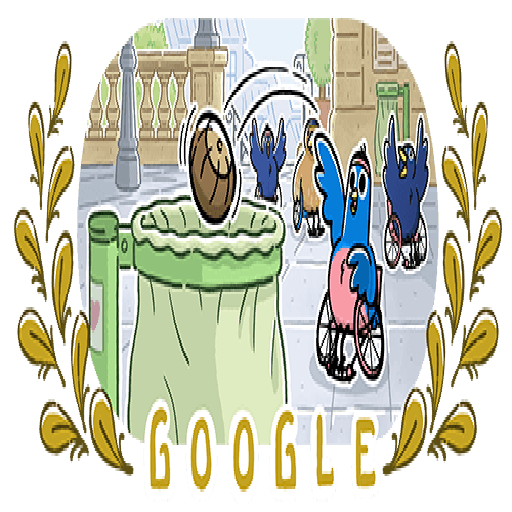

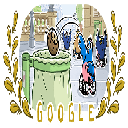

In [48]:
from PIL import Image
image = Image.open(original_image_path)


resized_image = image.resize((512, 512), Image.ANTIALIAS)
display(resized_image)

downsampled_image = resized_image.resize((128, 128), Image.ANTIALIAS)
display(downsampled_image)



Lab Task 6:
Write a function to create a white image of 500x500 (or any other size entered by the user) and then create 4 boxes of Red, Green, Blue and Black respectively on each corner of the image as shown below. The size of the colored boxes should be 1/8th the size of the image. (HINT: the arrays of ones and zeros can be in more than 2 dimensions)  

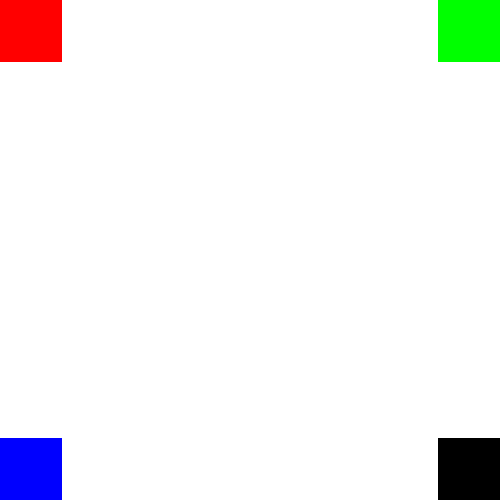

In [50]:
import numpy as np
from PIL import Image

def create_image_with_color_boxes(image_size, box_size_fraction=1/8):
    # Create an empty white image
    image = np.ones((image_size[1], image_size[0], 3), dtype=np.uint8) * 255  # White color

    # Calculate the size of colored boxes
    box_width = int(image_size[0] * box_size_fraction)
    box_height = int(image_size[1] * box_size_fraction)

    # Define the colors
    red_color = (255, 0, 0)
    green_color = (0, 255, 0)
    blue_color = (0, 0, 255)
    black_color = (0, 0, 0)

    # Place the colored boxes in each corner
    image[:box_height, :box_width] = red_color  # Top-left (Red)
    image[:box_height, -box_width:] = green_color  # Top-right (Green)
    image[-box_height:, :box_width] = blue_color  # Bottom-left (Blue)
    image[-box_height:, -box_width:] = black_color  # Bottom-right (Black)

    # Convert the NumPy array to a Pillow Image
    pil_image = Image.fromarray(image)

    return pil_image

# Example usage with a 500x500 image
image_size = (500, 500)
result_image = create_image_with_color_boxes(image_size)

# Display the image
display(result_image)

# Save the image to the disk
result_image.save("color_boxes_image.png")
